In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


def smooth_and_plot(csv_path, weight=0.9, plot=False):
    name = np.arange(6)
    original_data = pd.read_csv(filepath_or_buffer=csv_path, names=name, delimiter=',')

    data = pd.DataFrame()
    data['Value'] = original_data[3]
    data['Step'] = original_data[1]
    data['Value'] = data['Value'].apply(lambda x: float(x[3:]))
    data['Step'] = data['Step'].apply(lambda x: int(x[33:]))
    scalar = data['Value'].values
    last = scalar[0]
    # print(type(scalar))
    smoothed = []
    for point in scalar:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    if not plot:
        return smoothed
    steps = data['Step'].values
    steps = steps.tolist()
    origin = scalar.tolist()

    fig = plt.figure(1)
    # plt.plot(steps, origin, label='origin')
    plt.plot(steps, smoothed, label='smoothed')
    # plt.ylim(0, 220) # Tensorboard中会滤除过大的数据，可通过设置坐标最值来实现
    plt.legend()
    plt.show()

In [2]:
path = './exp/ic3net_grid_mppo_queue/log/1688480539.log'
grid_queue_mppo = smooth_and_plot(path, plot=False)

path = './exp/ic3net_large_grid_queue/log/1688272665.log'
grid_queue_ma2c = smooth_and_plot(path, plot=False)

path = './exp/ic3net_grid_ppo_queue/log/1688439418.log'
grid_queue_ippo = smooth_and_plot(path, plot=False)

path = './exp/ic3net_real_mppo_queue/log/1688538489.log'
monaco_queue_mppo = smooth_and_plot(path, plot=False)

path = './exp/ic3net_real_net_queue/log/1688313620.log'
monaco_queue_ma2c = smooth_and_plot(path, plot=False)

path = './exp/ic3net_real_ppo_queue/log/1688439263.log'
monaco_queue_ippo = smooth_and_plot(path, plot=False)

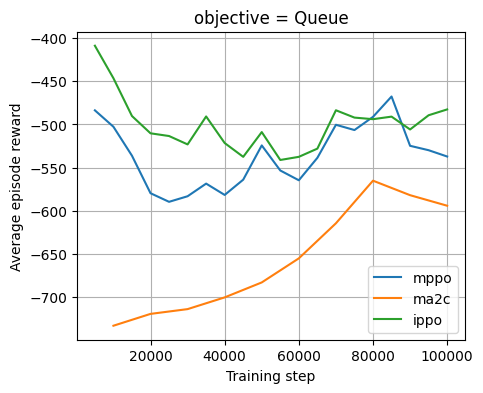

In [3]:
steps = np.arange(1000, 101000, 1000)
steps = steps.tolist()
steps10 = np.arange(10000, 101000, 10000)
steps10 = steps10.tolist()
steps20 = np.arange(5000, 101000, 5000)
steps20 = steps20.tolist()
fig = plt.figure(figsize = (5, 4))
plt.plot(steps20, [monaco_queue_mppo[i] for i in range(4, 101, 5)], label='mppo')
plt.plot(steps10, monaco_queue_ma2c, label='ma2c')
plt.plot(steps20, [monaco_queue_ippo[i] for i in range(4, 101, 5)], label='ippo')

plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
# plt.ylim(0, 220) # Tensorboard中会滤除过大的数据，可通过设置坐标最值来实现
plt.title('Objective = Queue')
plt.legend()
plt.savefig('real.queue.pdf')

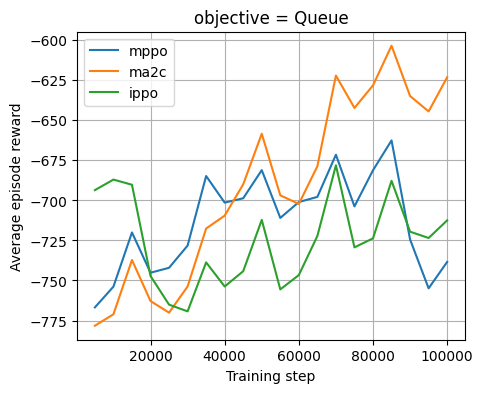

In [4]:
steps = np.arange(1000, 101000, 1000)
steps = steps.tolist()
steps10 = np.arange(10000, 101000, 10000)
steps10 = steps10.tolist()
steps20 = np.arange(5000, 101000, 5000)
steps20 = steps20.tolist()

fig = plt.figure(figsize = (5, 4))
plt.plot(steps20, [grid_queue_mppo[i] for i in range(4, 101, 5)], label='mppo')
plt.plot(steps20, [grid_queue_ma2c[i] for i in range(4, 101, 5)], label='ma2c')
plt.plot(steps20, [grid_queue_ippo[i] for i in range(4, 101, 5)], label='ippo')

plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Queue')
plt.legend()
plt.savefig('grid.queue.pdf')

In [5]:
path = './exp/ic3net_large_grid_wait/log/1688228548.log'
grid_wait_ma2c = smooth_and_plot(path, plot=False)

path = './exp/ic3net_grid_ppo_wait/log/1688449027.log'
grid_wait_ippo = smooth_and_plot(path, plot=False)

path = './exp/ic3net_real_net_wait/log/1688352422.log'
monaco_wait_ma2c = smooth_and_plot(path, plot=False)

path = './exp/ic3net_real_ppo_wait/log/1688461649.log'
monaco_wait_ippo = smooth_and_plot(path, plot=False)

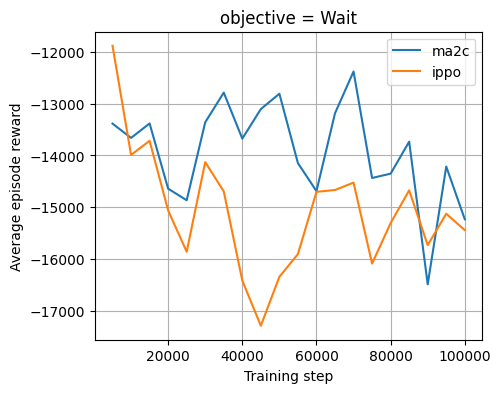

In [6]:
steps = np.arange(1000, 101000, 1000)
steps = steps.tolist()
steps10 = np.arange(10000, 101000, 10000)
steps10 = steps10.tolist()
steps20 = np.arange(5000, 101000, 5000)
steps20 = steps20.tolist()

fig = plt.figure(figsize = (5, 4))
plt.plot(steps20, [grid_wait_ma2c[i] for i in range(4, 101, 5)], label='ma2c')
plt.plot(steps20, [grid_wait_ippo[i] for i in range(4, 101, 5)], label='ippo')

plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Wait')
plt.legend()
plt.savefig('grid.wait.pdf')

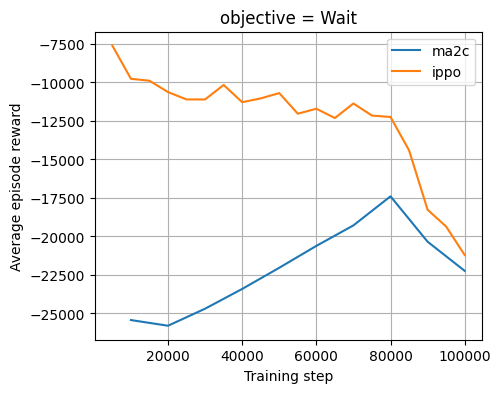

In [7]:
steps = np.arange(1000, 101000, 1000)
steps = steps.tolist()
steps10 = np.arange(10000, 101000, 10000)
steps10 = steps10.tolist()
steps20 = np.arange(5000, 101000, 5000)
steps20 = steps20.tolist()

fig = plt.figure(figsize = (5, 4))
plt.plot(steps10, monaco_wait_ma2c, label='ma2c')
plt.plot(steps20, [monaco_wait_ippo[i] for i in range(4, 101, 5)], label='ippo')

plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Wait')
plt.legend()
plt.savefig('real.wait.pdf')

['loss/nc_entropy_loss', 'loss/nc_policy_loss', 'loss/nc_value_loss', 'loss/nc_total_loss', 'train_reward']


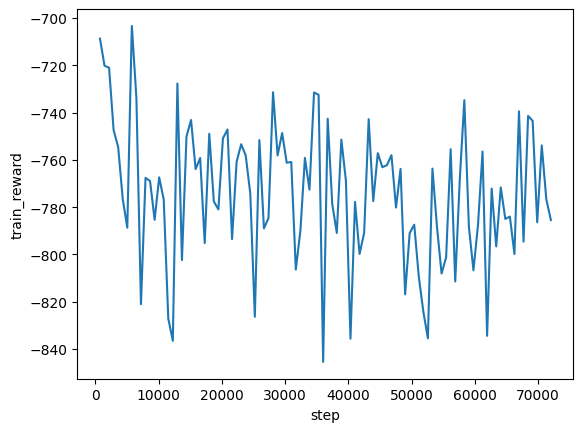

In [2]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
 
def read_tensorboard_data(tensorboard_path, val_name):
    ea = event_accumulator.EventAccumulator(tensorboard_path)
    ea.Reload()
    print(ea.scalars.Keys())
    val = ea.scalars.Items(val_name)
    return val
 


['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']
['loss/nc_entropy_loss', 'loss/nc_policy_loss', 'loss/nc_value_loss', 'loss/nc_total_loss', 'train_reward']


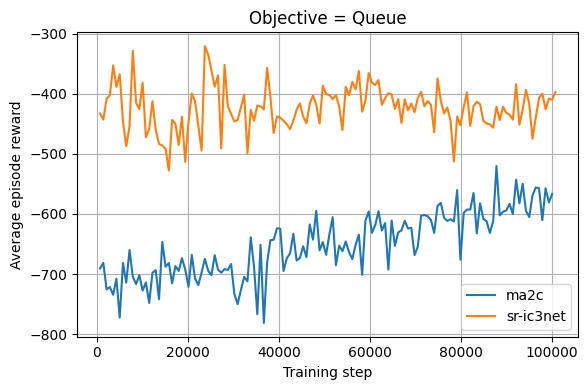

In [47]:
fig = plt.figure(figsize = (6, 4))
val_name = 'train_reward'
plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Queue')

# ma2c_grid = 'exp\ma2c_nc_large_grid\log\events.out.tfevents.1688490071.node008.878923.0'
r = 140
ma2c_grid = 'exp\ic3net_large_grid_queue\log\events.out.tfevents.1688272666.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ma2c_grid, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ma2c')

resSRIC3Net_monaco = 'exp\ma2c_nc_resample_large_net\log\events.out.tfevents.1688534895.node001.3394438.0'
val = read_tensorboard_data(resSRIC3Net_monaco, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='sr-ic3net')
plt.legend()
plt.tight_layout()

plt.savefig('grid.sric3.pdf')

['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']
['loss/nc_entropy_loss', 'loss/nc_policy_loss', 'loss/nc_value_loss', 'loss/nc_total_loss', 'train_reward']


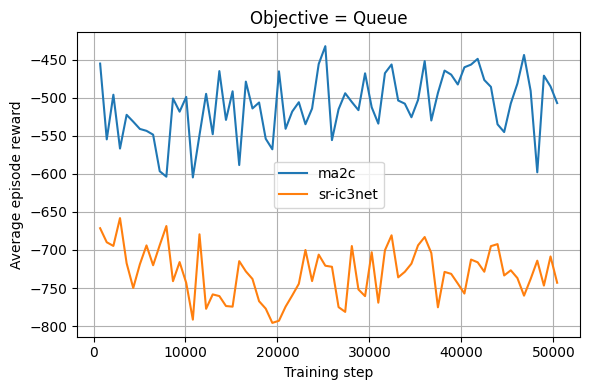

In [48]:
fig = plt.figure(figsize = (6, 4))

val_name = 'train_reward'
plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Queue')

r= 70
ma2c_monaco = 'exp\ic3net_real_net_queue\log\events.out.tfevents.1688313621.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ma2c_monaco, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ma2c')

resSRIC3Net_grid = 'exp\ma2c_nc_resample_large_grid\log\events.out.tfevents.1688530439.node001.3313340.0'
val = read_tensorboard_data(resSRIC3Net_grid, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='sr-ic3net')

plt.legend()
plt.tight_layout()

plt.savefig('real.sric3.pdf')

['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']
['loss/lstm_0_entropy_loss', 'loss/lstm_0_policy_loss', 'loss/lstm_0_value_loss', 'loss/lstm_0_total_loss', 'train_reward']
['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']


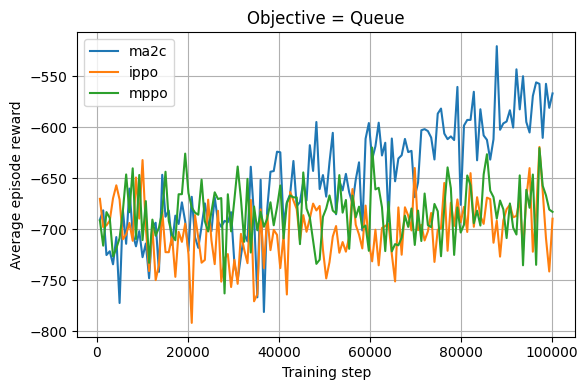

In [49]:
fig = plt.figure(figsize = (6, 4))
val_name = 'train_reward'
plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Queue')

r = 140
ma2c_grid = 'exp\ic3net_large_grid_queue\log\events.out.tfevents.1688272666.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ma2c_grid, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ma2c')

ippo_grid = 'exp\ic3net_grid_ppo_queue\log\events.out.tfevents.1688439419.node001'
val = read_tensorboard_data(ippo_grid, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ippo')

mppo_grid = 'exp\ic3net_grid_mppo_queue\log\events.out.tfevents.1688480540.node001'
val = read_tensorboard_data(mppo_grid, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='mppo')

plt.legend()
plt.tight_layout()

plt.savefig('grid.queue.pdf')

['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']
['loss/lstm_0_entropy_loss', 'loss/lstm_0_policy_loss', 'loss/lstm_0_value_loss', 'loss/lstm_0_total_loss', 'train_reward']
['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']


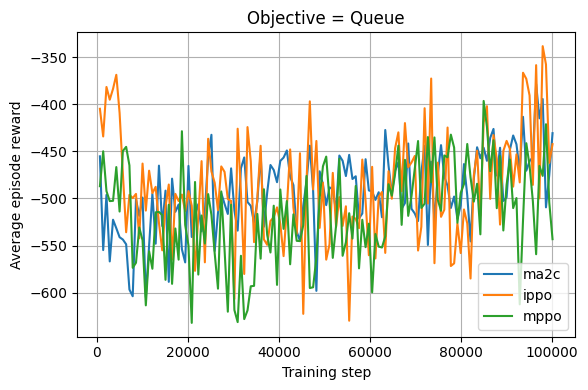

In [50]:
fig = plt.figure(figsize = (6, 4))
val_name = 'train_reward'
plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Queue')

r = 140
ma2c_real = 'exp\ic3net_real_net_queue\log\events.out.tfevents.1688313621.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ma2c_real, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ma2c')

ippo_real= 'exp\ic3net_real_ppo_queue\log\events.out.tfevents.1688439264.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ippo_real, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ippo')

mppo_real = 'exp\ic3net_real_mppo_queue\log\events.out.tfevents.1688538490.node008'
val = read_tensorboard_data(mppo_real, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='mppo')

plt.legend()
plt.tight_layout()

plt.savefig('real.queue.pdf')

['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']
['loss/lstm_0_entropy_loss', 'loss/lstm_0_policy_loss', 'loss/lstm_0_value_loss', 'loss/lstm_0_total_loss', 'train_reward']


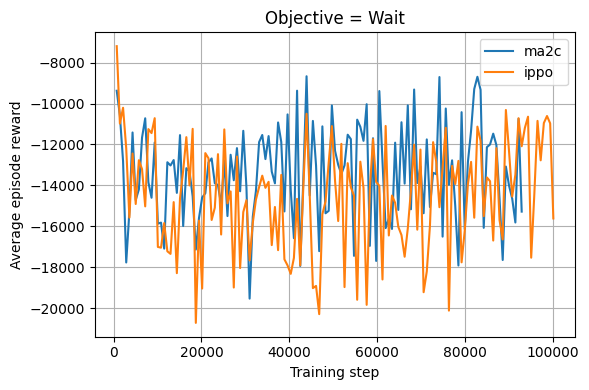

In [51]:
fig = plt.figure(figsize = (6, 4))
val_name = 'train_reward'
plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Wait')

r = 140
ma2c_wait = 'exp\ic3net_large_grid_wait\log\events.out.tfevents.1688228550.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ma2c_wait, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ma2c')

ippo_wait= 'exp\ic3net_grid_ppo_wait\log\events.out.tfevents.1688449029.node001'
val = read_tensorboard_data(ippo_wait, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ippo')

plt.legend()
plt.tight_layout()
plt.savefig('grid.wait.pdf')

['loss/cnet_entropy_loss', 'loss/cnet_policy_loss', 'loss/cnet_value_loss', 'loss/cnet_total_loss', 'train_reward']
['loss/lstm_0_entropy_loss', 'loss/lstm_0_policy_loss', 'loss/lstm_0_value_loss', 'loss/lstm_0_total_loss', 'train_reward']


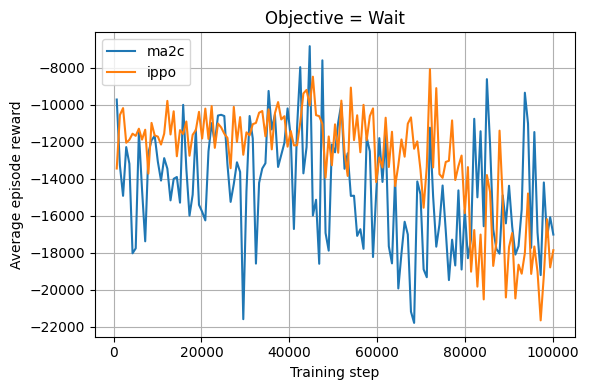

In [52]:
fig = plt.figure(figsize = (6, 4))
val_name = 'train_reward'
plt.grid(True)
plt.xlabel('Training step')
plt.ylabel('Average episode reward')
plt.title('Objective = Wait')

r = 140
ma2c_real = 'exp\ic3net_real_net_wait\log\events.out.tfevents.1688352423.DESKTOP-2O2FRN8'
val = read_tensorboard_data(ma2c_real, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ma2c')

ippo_real= 'exp\ic3net_real_ppo_wait\log\events.out.tfevents.1688461650.node001'
val = read_tensorboard_data(ippo_real, val_name)
plt.plot([i.step for i in val[:r]], [j.value for j in val[:r]], label='ippo')

plt.legend()
plt.tight_layout()
plt.savefig('real.wait.pdf')